# 极限森林

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import datasets
import graphviz
from sklearn import tree
import matplotlib.pyplot as  plt 

In [2]:
X,y = datasets.load_wine(return_X_y=True)

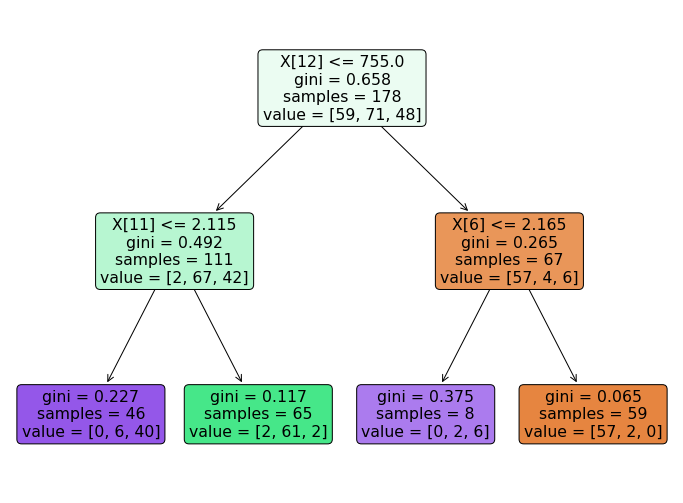

In [6]:
model = DecisionTreeClassifier(max_depth=2) # 筛选条件，最优的
model.fit(X,y)
# dot_data = tree.export_graphviz(model,filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=1,rounded=1)  

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
count = []
for i in range(3):
    count.append((y == i).sum())
count = np.array(count)
p = count / count.sum() # 计算概率

gini = (p * (1 - p)).sum()
print('未分裂，gini系数是：',round(gini,3))

未分裂，gini系数是： 0.658


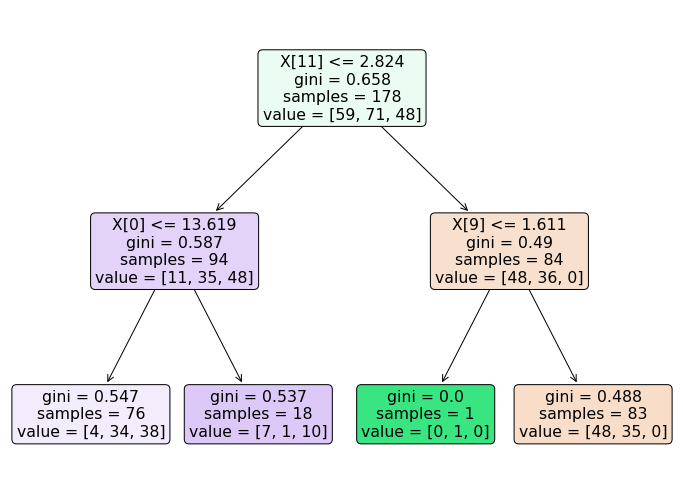

In [14]:
clf = ExtraTreesClassifier(n_estimators=3,max_depth=2)
clf.fit(X,y)
# dot_data = tree.export_graphviz(clf[0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[0],filled=True,rounded=1)

In [11]:
f = np.sort(X[:,12])
gini_lower = 1
best_split = {}
for i in range(len(f) - 1):
    split = round(f[i:i + 2].mean(),3)
    cond = X[:,12] <= split
    part1 = y[cond]
    part2 = y[~cond]
    # 计算每一部分的gini系数
    count1 = []
    count2 = []
    for j in range(3):
        count1.append((part1 == j).sum())
        count2.append((part2 == j).sum())
    count1,count2 = np.array(count1),np.array(count2)
    p1 = count1 / count1.sum()
    p2 = count2 / count2.sum()
    gini1 = round((p1 * (1 - p1)).sum(),3)
    gini2 = round((p2 * (1 - p2)).sum(),3)
    # 计算整体的gini系数
    gini = round(gini1 * count1.sum()/(y.size) + gini2 * count2.sum()/(y.size),3)
    if gini <= gini_lower:
        gini_lower = gini
        best_split.clear()
        best_split['最佳裂分条件：'] = split
#     print(split,gini1,gini2,gini,count1,count2)
print(best_split,gini_lower)

{'最佳裂分条件：': 755.0} 0.407


In [12]:
np.round(111/178 * 0.492 + 67/178 * 0.265,3)

0.407

# GBDT梯度提升树

In [15]:
#gradient 梯度，导数
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [16]:
X,y = datasets.load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1124)

## 普通决策树

决策分类树得分是： 0.8421052631578947


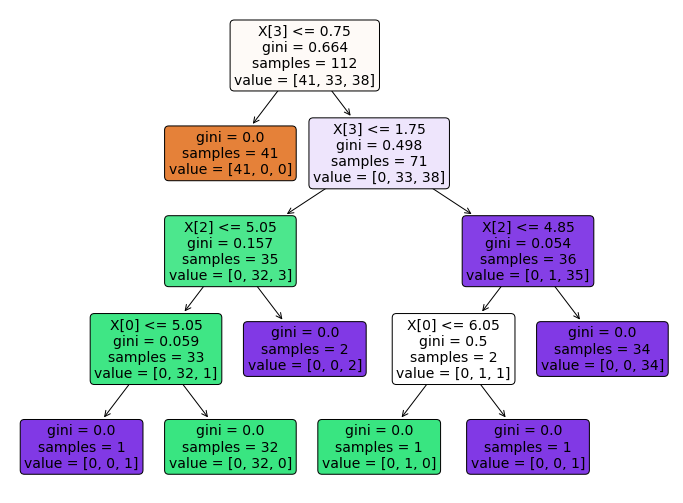

In [17]:
model = DecisionTreeClassifier() # 一棵树，单打独斗,分类：信息熵、gini系数
model.fit(X_train,y_train)
print('决策分类树得分是：',model.score(X_test,y_test))

# dot_data = tree.export_graphviz(model,filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=True,rounded=1)

## 梯度提升树

梯度提升树得分是： 0.9473684210526315


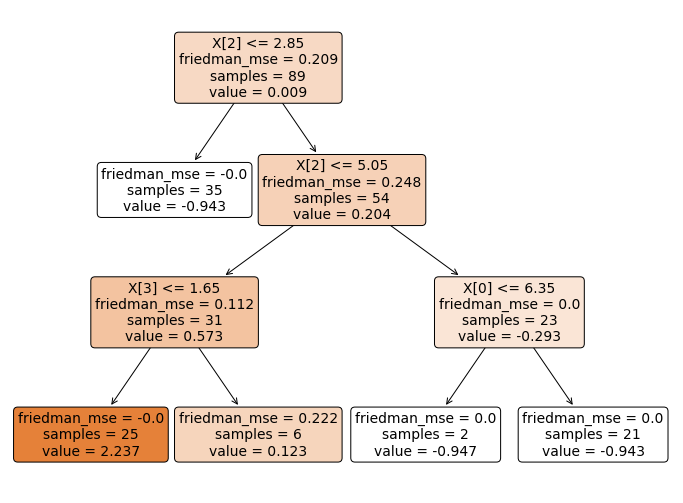

In [19]:
model = GradientBoostingClassifier(subsample=0.8,# 随机抽样比例
                                   learning_rate=0.005)# 学习率
model.fit(X_train,y_train)
print('梯度提升树得分是：',model.score(X_test,y_test))

# 三分类，100 * 3 = 300
# dot_data = tree.export_graphviz(model[99,2],filled=True,rounded=True)
# graphviz.Source(dot_data)

plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[1,1],filled=True,rounded=1)

# GBDT梯度提升分类树算法示例

## 创建数据

In [20]:
import numpy as np
import graphviz
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
X = np.arange(1,11).reshape(-1,1)
y = np.array([0,0,0,1,1]*2)
display(X,y)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

## 构建GBDT训练和预测

In [22]:
clf = GradientBoostingClassifier(n_estimators=3,learning_rate=0.1,max_depth=1)
clf.fit(X,y)
y_ = clf.predict(X)
print('预测结果是：',y_)

预测结果是： [0 0 0 0 0 0 0 0 1 1]


In [23]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [25]:
np.round(clf.predict_proba(X),2)

array([[0.66, 0.34],
       [0.66, 0.34],
       [0.66, 0.34],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.47, 0.53],
       [0.47, 0.53]])

## 第一棵树可视化

In [26]:
clf[0,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      random_state=RandomState(MT19937) at 0x7FE0C0523B40)

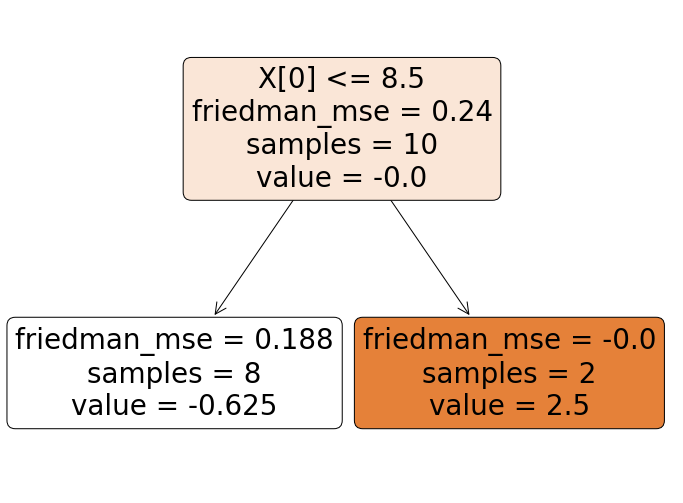

In [27]:
# dot_data = tree.export_graphviz(clf[0,0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[0,0],filled=True,rounded=1)

## 第二棵树

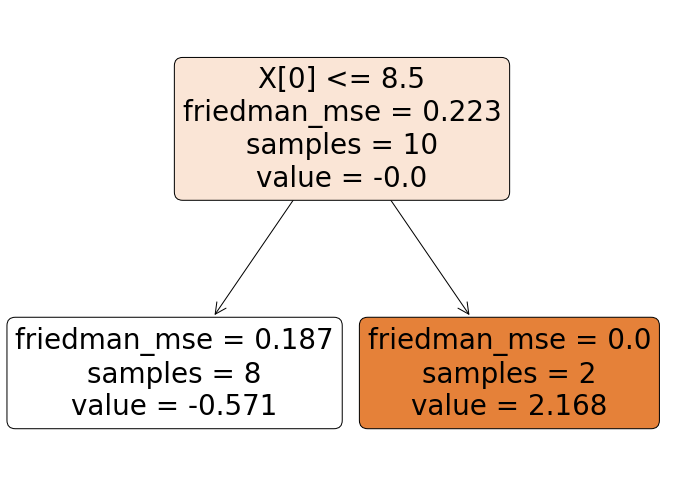

In [29]:
# dot_data = tree.export_graphviz(clf[1,0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[1,0],filled=True,rounded=1)

## 第三棵树

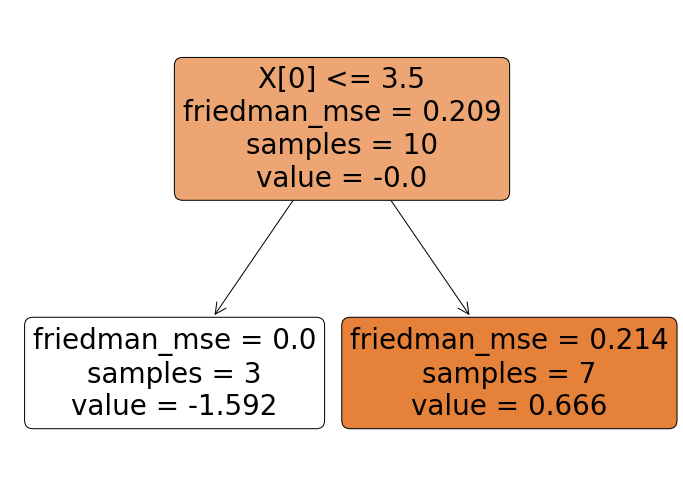

In [30]:
# dot_data = tree.export_graphviz(clf[2,0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[2,0],filled=True,rounded=1)

# 拟合

## 拟合第一棵树

𝐹0(𝑥)=𝑙𝑜𝑔∑𝑖=1𝑁𝑦𝑖∑𝑖=1𝑁(1−𝑦𝑖)

In [31]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [32]:
# 函数初始值
F0 = np.log(y.sum()/(1 - y).sum())
F0

-0.40546510810816444

In [33]:
# 计算残差：真实值和预测值之间的差
residual0 = y - 1/(1 + np.exp(-F0))
residual0

array([-0.4, -0.4, -0.4,  0.6,  0.6, -0.4, -0.4, -0.4,  0.6,  0.6])

In [34]:
# 未进行分裂时，均方误差
((residual0 - residual0.mean())**2).mean()

0.24

In [35]:
X.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [36]:
lower_mse = 0.24
best_split = {}
# 分裂标准
for i in range(0,10): # i 从0开始
    if i == 9: # 说明没有进行分裂
        mse = ((residual0 - residual0.mean())**2).mean()
    else:
        left = residual0[:i + 1]
        right = residual0[i+1:]
        left_mse = ((left - left.mean())**2).mean()
        right_mse = ((right - right.mean())**2).mean()
        mse = left_mse * (i + 1)/10 + right_mse * (10 -i -1)/10
        print(X[i:i+2].mean(),np.round(left_mse,3),np.round(right_mse,3))
    if lower_mse > mse:
        lower_mse = mse
        best_split.clear()
        best_split['X[0] <='] = X[i:i + 2].mean()
print(best_split)

1.5 0.0 0.247
2.5 0.0 0.25
3.5 0.0 0.245
4.5 0.188 0.25
5.5 0.24 0.24
6.5 0.222 0.25
7.5 0.204 0.222
8.5 0.188 0.0
9.5 0.222 0.0
{'X[0] <=': 8.5}


In [37]:
# -0.625
gamma1 =  residual0[:8].sum()/((y[:8] - residual0[:8])*(1-y[:8] + residual0[:8])).sum()
gamma1

-0.6250000000000001

In [38]:
gamma2 =  residual0[8:].sum()/((y[8:] - residual0[8:])*(1-y[8:] + residual0[8:])).sum()
gamma2

2.5

## 拟合第二棵树

In [39]:
# 第一棵树的负梯度（预测值）
# 10个样本
gamma = np.array([gamma1]*8 + [gamma2]*2)
gamma

array([-0.625, -0.625, -0.625, -0.625, -0.625, -0.625, -0.625, -0.625,
        2.5  ,  2.5  ])

In [40]:
learning_rate = 0.1 # 学习率

In [41]:
# 在第一棵树的基础上，进行梯度提升
F1 = F0 + learning_rate * gamma
F1

array([-0.46796511, -0.46796511, -0.46796511, -0.46796511, -0.46796511,
       -0.46796511, -0.46796511, -0.46796511, -0.15546511, -0.15546511])

In [42]:
residual1 = y - 1/(1 + np.exp(-F1))
residual1

array([-0.38509799, -0.38509799, -0.38509799,  0.61490201,  0.61490201,
       -0.38509799, -0.38509799, -0.38509799,  0.53878818,  0.53878818])

In [43]:
# 执行到这里，自己算的和GBDT画出来的图形上面数据一致
np.round(((residual1 - residual1.mean())**2).mean(),3)

0.223

In [44]:
X.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
lower_mse = 0.223
best_split = {}
for i in range(10):
    if i == 9: # 9是最后一个值，range(10)取不到10
        mse = np.round(((residual1 - residual1.mean())**2).mean(),3)
    else:
        left = residual1[:i+1]  # 左闭右开
        right = residual1[i+1:]
        left_mse = ((left - left.mean())**2).mean()
        right_mse = ((right - right.mean())**2).mean()
        mse = left_mse * (i + 1)/10 + right_mse * (10 - i -1)/10
    if lower_mse > mse:
        lower_mse = mse
        best_split.clear()
        best_split['X[0]<='] = X[i:i+2].mean()
    print('从第%d个数据进行分类'%(i + 1),np.round(left_mse,5),np.round(right_mse,5))
print('最优的分裂条件是：',best_split)

从第1个数据进行分类 0.0 0.22912
从第2个数据进行分类 0.0 0.23206
从第3个数据进行分类 0.0 0.22744
从第4个数据进行分类 0.1875 0.22592
从第5个数据进行分类 0.24 0.20486
从第6个数据进行分类 0.22222 0.21339
从第7个数据进行分类 0.20408 0.18968
从第8个数据进行分类 0.1875 0.0
从第9个数据进行分类 0.21152 0.0
从第10个数据进行分类 0.21152 0.0
最优的分裂条件是： {'X[0]<=': 8.5}


In [46]:
# 计算的是左右两边叶节点的预测值
gamma1 = residual1[:8].sum()/(((y[:8] - residual1[:8])*(1 - y[:8] + residual1[:8])).sum())
np.round(gamma1,3)

-0.571

In [47]:
gamma2 = residual1[8:].sum()/(((y[8:] - residual1[8:])*(1 - y[8:] + residual1[8:])).sum())
np.round(gamma2,3)

2.168

## 拟合第三棵树

In [48]:
# 获取第二棵树的负梯度（叶节点预测值：value）
gamma = np.array([gamma1] * 8 + [gamma2] * 2)
gamma

array([-0.57052111, -0.57052111, -0.57052111, -0.57052111, -0.57052111,
       -0.57052111, -0.57052111, -0.57052111,  2.16820117,  2.16820117])

In [49]:
F2 = F1 + gamma * learning_rate
F2

array([-0.52501722, -0.52501722, -0.52501722, -0.52501722, -0.52501722,
       -0.52501722, -0.52501722, -0.52501722,  0.06135501,  0.06135501])

In [50]:
residual2 = y - 1/(1 + np.exp(-F2))
residual2

array([-0.37167979, -0.37167979, -0.37167979,  0.62832021,  0.62832021,
       -0.37167979, -0.37167979, -0.37167979,  0.48466606,  0.48466606])

In [51]:
np.round(((residual2 - residual2.mean())**2).mean(),3)

0.209

In [52]:
lower_mse = 0.209
best_split = {}
for i in range(10):
    if i == 9: # 9是最后一个值，range(10)取不到10
        mse = np.round(((residual2 - residual2.mean())**2).mean(),3)
    else:
        left = residual2[:i+1]  # 左闭右开
        right = residual2[i+1:]
        left_mse = ((left - left.mean())**2).mean()
        right_mse = ((right - right.mean())**2).mean()
        mse = left_mse * (i + 1)/10 + right_mse * (10 - i -1)/10
    if lower_mse > mse:
        lower_mse = mse
        best_split.clear()
        best_split['X[0]<='] = X[i:i+2].mean()
    print('从第%d个数据进行分类'%(i + 1),np.round(left_mse,5),np.round(right_mse,5))
print('最优的分裂条件是：',best_split)

从第1个数据进行分类 0.0 0.21501
从第2个数据进行分类 0.0 0.21796
从第3个数据进行分类 0.0 0.21393
从第4个数据进行分类 0.1875 0.2067
从第5个数据进行分类 0.24 0.176
从第6个数据进行分类 0.22222 0.18333
从第7个数据进行分类 0.20408 0.16296
从第8个数据进行分类 0.1875 0.0
从第9个数据进行分类 0.20298 0.0
从第10个数据进行分类 0.20298 0.0
最优的分裂条件是： {'X[0]<=': 3.5}


In [53]:
gamma1 = residual2[:3].sum()/(((y[:3] - residual2[:3]) * (1 - y[:3] + residual2[:3])).sum())
np.round(gamma1,3)

-1.592

In [54]:
gamma2 = residual2[3:].sum()/(((y[3:] - residual2[3:]) *   (1 - y[3:] + residual2[3:])).sum())
np.round(gamma2,3)

0.666

## 预测概率是

In [58]:
# 算法预测的概率
proba_ = clf.predict_proba(X)
print(np.round(proba_,2))

[[0.66 0.34]
 [0.66 0.34]
 [0.66 0.34]
 [0.61 0.39]
 [0.61 0.39]
 [0.61 0.39]
 [0.61 0.39]
 [0.61 0.39]
 [0.47 0.53]
 [0.47 0.53]]


In [56]:
# 概率转换为类别
proba_.argmax(axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [57]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [59]:
# 叶节点的value，预测值，负梯度
gamma = np.array([gamma1] * 3 + [gamma2] * 7)
gamma

array([-1.59154518, -1.59154518, -1.59154518,  0.66634692,  0.66634692,
        0.66634692,  0.66634692,  0.66634692,  0.66634692,  0.66634692])

In [60]:
F3 = F2 + learning_rate * gamma
F3

array([-0.68417174, -0.68417174, -0.68417174, -0.45838253, -0.45838253,
       -0.45838253, -0.45838253, -0.45838253,  0.1279897 ,  0.1279897 ])

In [61]:
# 默认情况下计算的是类别1
# 两类：0、1
p = 1/(1 + np.exp(-F3))
p

array([0.33533085, 0.33533085, 0.33533085, 0.3873696 , 0.3873696 ,
       0.3873696 , 0.3873696 , 0.3873696 , 0.53195382, 0.53195382])

In [62]:
proba_

array([[0.66466915, 0.33533085],
       [0.66466915, 0.33533085],
       [0.66466915, 0.33533085],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.46804618, 0.53195382],
       [0.46804618, 0.53195382]])

In [63]:
np.c_[1-p,p]

array([[0.66466915, 0.33533085],
       [0.66466915, 0.33533085],
       [0.66466915, 0.33533085],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.6126304 , 0.3873696 ],
       [0.46804618, 0.53195382],
       [0.46804618, 0.53195382]])